In [1]:
import os
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set_style("whitegrid")

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# # change your project path here to have the access to the data folder
# root_path = "/content/drive/My Drive/"
# project_path = "Notebooks/network_analysis/"
# cur_dir = os.path.join(root_path, project_path)
# # go to the current directory
# %cd $cur_dir

In [4]:
# !git clone https://github.com/ruathudo/network-analysis-uoh.git
# %cd network-analysis-uoh/

In [5]:
df = pd.read_csv('../data/merged_traffic_network_statistics.csv', delimiter=";")

In [6]:
df.head()

city_name        pos hours_congestion year_change   cost  inner_time  \
0         acapulco   97 (109)        102 (112)          9%      -           4   
1         adelaide    72 (55)         76 (154)        -21%      -           5   
2  albuquerque, nm  192 (195)         57 (186)         -5%  $792            4   
3        amsterdam  115 (105)         69 (164)        -12%      -           4   
4          antwerp   94 (101)         141 (56)          2%      -           6   

   inner_mile_speed          city_name.y    graph_area      n      ...       \
0                16         "acapulco\n"  7.932883e+07     53      ...        
1                12         "adelaide\n"  1.474411e+07   1235      ...        
2                16  "albuquerque, nm\n"  6.770976e+08  22985      ...        
3                16        "amsterdam\n"  2.475683e+08  13227      ...        
4                10          "antwerp\n"  2.494694e+08   8058      ...        

   clean_intersection_density_km  avg_neighbor_degree_avg  \
0                            NaN                 2.735849   
1                            NaN                 2.445614   
2                            NaN                 2.776909   
3                            NaN                 2.457754   
4                            NaN                 2.401971   

   avg_weighted_neighbor_degree_avg  degree_centrality_avg  \
0                          0.012757               0.089985   
1                          0.047553               0.003598   
2                          0.037963               0.000219   
3                          0.048698               0.000346   
4                          0.045957               0.000557   

   clustering_coefficient_avg  clustering_coefficient_weighted_avg  \
0                    0.106918                             0.009878   
1                    0.064804                             0.001276   
2                    0.047554                             0.000620   
3                    0.062075                             0.001025   
4                    0.066915                             0.000914   

   pagerank_max_node  pagerank_max  pagerank_min_node  pagerank_min  
0         5944368201      0.047950         4129211479      0.003521  
1          664980559      0.003114           29745814      0.000124  
2          140886274      0.000172          140740499      0.000007  
3           46388344      0.000337           46128874      0.000011  
4          338768932      0.000685           21280953      0.000019  

[5 rows x 36 columns]

In [7]:
df.shape

(197, 36)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 36 columns):
city_name                              197 non-null object
pos                                    197 non-null object
hours_congestion                       197 non-null object
year_change                            197 non-null object
cost                                   197 non-null object
inner_time                             197 non-null int64
inner_mile_speed                       197 non-null int64
city_name.y                            197 non-null object
graph_area                             197 non-null float64
n                                      197 non-null int64
m                                      197 non-null int64
k_avg                                  197 non-null float64
intersection_count                     197 non-null int64
streets_per_node_avg                   197 non-null float64
edge_length_total                      197 non-null float64
edge_length

In [9]:
df = df.dropna(axis=1)

In [10]:
df.shape

(197, 34)

In [11]:
# convert the object type to numeric type
df['hours_congestion'] = df['hours_congestion'].apply(lambda x: int(x.split(" ")[0]))
# df['year_change'] = df['year_change'].apply(lambda x: int(x.replace('%', '')))

In [12]:
df.head()

city_name        pos  hours_congestion year_change   cost  \
0         acapulco   97 (109)               102          9%      -   
1         adelaide    72 (55)                76        -21%      -   
2  albuquerque, nm  192 (195)                57         -5%  $792    
3        amsterdam  115 (105)                69        -12%      -   
4          antwerp   94 (101)               141          2%      -   

   inner_time  inner_mile_speed          city_name.y    graph_area      n  \
0           4                16         "acapulco\n"  7.932883e+07     53   
1           5                12         "adelaide\n"  1.474411e+07   1235   
2           4                16  "albuquerque, nm\n"  6.770976e+08  22985   
3           4                16        "amsterdam\n"  2.475683e+08  13227   
4           6                10          "antwerp\n"  2.494694e+08   8058   

       ...       self_loop_proportion  avg_neighbor_degree_avg  \
0      ...                   0.000000                 2.735849   
1      ...                   0.000000                 2.445614   
2      ...                   0.001767                 2.776909   
3      ...                   0.007041                 2.457754   
4      ...                   0.003318                 2.401971   

   avg_weighted_neighbor_degree_avg  degree_centrality_avg  \
0                          0.012757               0.089985   
1                          0.047553               0.003598   
2                          0.037963               0.000219   
3                          0.048698               0.000346   
4                          0.045957               0.000557   

   clustering_coefficient_avg  clustering_coefficient_weighted_avg  \
0                    0.106918                             0.009878   
1                    0.064804                             0.001276   
2                    0.047554                             0.000620   
3                    0.062075                             0.001025   
4                    0.066915                             0.000914   

   pagerank_max_node  pagerank_max  pagerank_min_node  pagerank_min  
0         5944368201      0.047950         4129211479      0.003521  
1          664980559      0.003114           29745814      0.000124  
2          140886274      0.000172          140740499      0.000007  
3           46388344      0.000337           46128874      0.000011  
4          338768932      0.000685           21280953      0.000019  

[5 rows x 34 columns]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 34 columns):
city_name                              197 non-null object
pos                                    197 non-null object
hours_congestion                       197 non-null int64
year_change                            197 non-null object
cost                                   197 non-null object
inner_time                             197 non-null int64
inner_mile_speed                       197 non-null int64
city_name.y                            197 non-null object
graph_area                             197 non-null float64
n                                      197 non-null int64
m                                      197 non-null int64
k_avg                                  197 non-null float64
intersection_count                     197 non-null int64
streets_per_node_avg                   197 non-null float64
edge_length_total                      197 non-null float64
edge_length_

In [14]:
# because most of the city don't have cost stats, so drop this column
df = df.drop(['pos', 'cost', 'city_name.y', 'year_change'], axis=1)
# df = df[df['city_name'] != 'acapulco']

In [15]:
def filter_bad(df):
    filtered = df[np.log(df['graph_area']) > np.mean(np.log(df['graph_area']) - np.std(np.log(df['graph_area'])))]
    # if log(graph_area) < mean(log(graph_area)) - sd(log(graph_area))
    filtered = filtered.reset_index(drop=True)
    
    # filter also the exceptional cities:
    idx = [0, 12, 76, 91, 92, 167, 172]
    filtered = filtered[~filtered.index.isin(idx)]
    filtered = filtered.reset_index(drop=True)
    return filtered

In [16]:
df = filter_bad(df)

In [17]:
df.shape

(173, 30)

In [18]:
df.describe()

hours_congestion  inner_time  inner_mile_speed    graph_area  \
count        173.000000  173.000000        173.000000  1.730000e+02   
mean         108.676301    4.965318         12.965318  1.697762e+09   
std           50.634800    1.434200          3.420009  7.447003e+09   
min           22.000000    3.000000          6.000000  5.159319e+07   
25%           69.000000    4.000000         10.000000  1.942160e+08   
50%          102.000000    5.000000         13.000000  4.426090e+08   
75%          141.000000    6.000000         15.000000  9.222204e+08   
max          272.000000   10.000000         23.000000  9.109277e+10   

                   n              m       k_avg  intersection_count  \
count     173.000000     173.000000  173.000000          173.000000   
mean    16960.433526   41704.797688    4.829121        14241.826590   
std     13602.533035   34657.906929    0.501005        11754.626329   
min      2109.000000    4773.000000    3.715687         1696.000000   
25%      8357.000000   19633.000000    4.495002         6797.000000   
50%     12733.000000   30068.000000    4.811941        10268.000000   
75%     22044.000000   56223.000000    5.203807        18376.000000   
max    102746.000000  258618.000000    6.107441        87145.000000   

       streets_per_node_avg  edge_length_total      ...       \
count            173.000000       1.730000e+02      ...        
mean               2.864600       5.520289e+06      ...        
std                0.249808       4.645877e+06      ...        
min                2.264410       5.893726e+05      ...        
25%                2.716522       2.226473e+06      ...        
50%                2.873322       3.836428e+06      ...        
75%                3.024940       7.197005e+06      ...        
max                3.421026       2.385873e+07      ...        

       self_loop_proportion  avg_neighbor_degree_avg  \
count            173.000000               173.000000   
mean               0.004313                 2.653877   
std                0.003946                 0.265081   
min                0.000292                 1.933628   
25%                0.001545                 2.515608   
50%                0.003244                 2.700537   
75%                0.005595                 2.824059   
max                0.023864                 3.199069   

       avg_weighted_neighbor_degree_avg  degree_centrality_avg  \
count                        173.000000             173.000000   
mean                           0.047213               0.000441   
std                            0.021202               0.000290   
min                            0.021409               0.000049   
25%                            0.033165               0.000227   
50%                            0.041341               0.000382   
75%                            0.051571               0.000580   
max                            0.144026               0.002147   

       clustering_coefficient_avg  clustering_coefficient_weighted_avg  \
count                  173.000000                           173.000000   
mean                     0.052285                             0.000943   
std                      0.018485                             0.000569   
min                      0.020415                             0.000031   
25%                      0.037840                             0.000555   
50%                      0.048772                             0.000883   
75%                      0.062861                             0.001236   
max                      0.122068                             0.003657   

       pagerank_max_node  pagerank_max  pagerank_min_node  pagerank_min  
count       1.730000e+02    173.000000       1.730000e+02    173.000000  
mean        9.097099e+08      0.000420       2.311527e+08      0.000014  
std         1.458631e+09      0.000307       6.064490e+08      0.000010  
min         4.907260e+05      0.000037       1.031320e+05      0.000001  
25%         6

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 30 columns):
city_name                              173 non-null object
hours_congestion                       173 non-null int64
inner_time                             173 non-null int64
inner_mile_speed                       173 non-null int64
graph_area                             173 non-null float64
n                                      173 non-null int64
m                                      173 non-null int64
k_avg                                  173 non-null float64
intersection_count                     173 non-null int64
streets_per_node_avg                   173 non-null float64
edge_length_total                      173 non-null float64
edge_length_avg                        173 non-null float64
street_length_total                    173 non-null float64
street_length_avg                      173 non-null float64
street_segments_count                  173 non-null int64
node_densi

In [20]:
# now we are good to have some statistic

def correlation_heatmap(data):
    fig, ax = plt.subplots(figsize =(25, 25))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    fig = sns.heatmap(
        data.corr(),
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

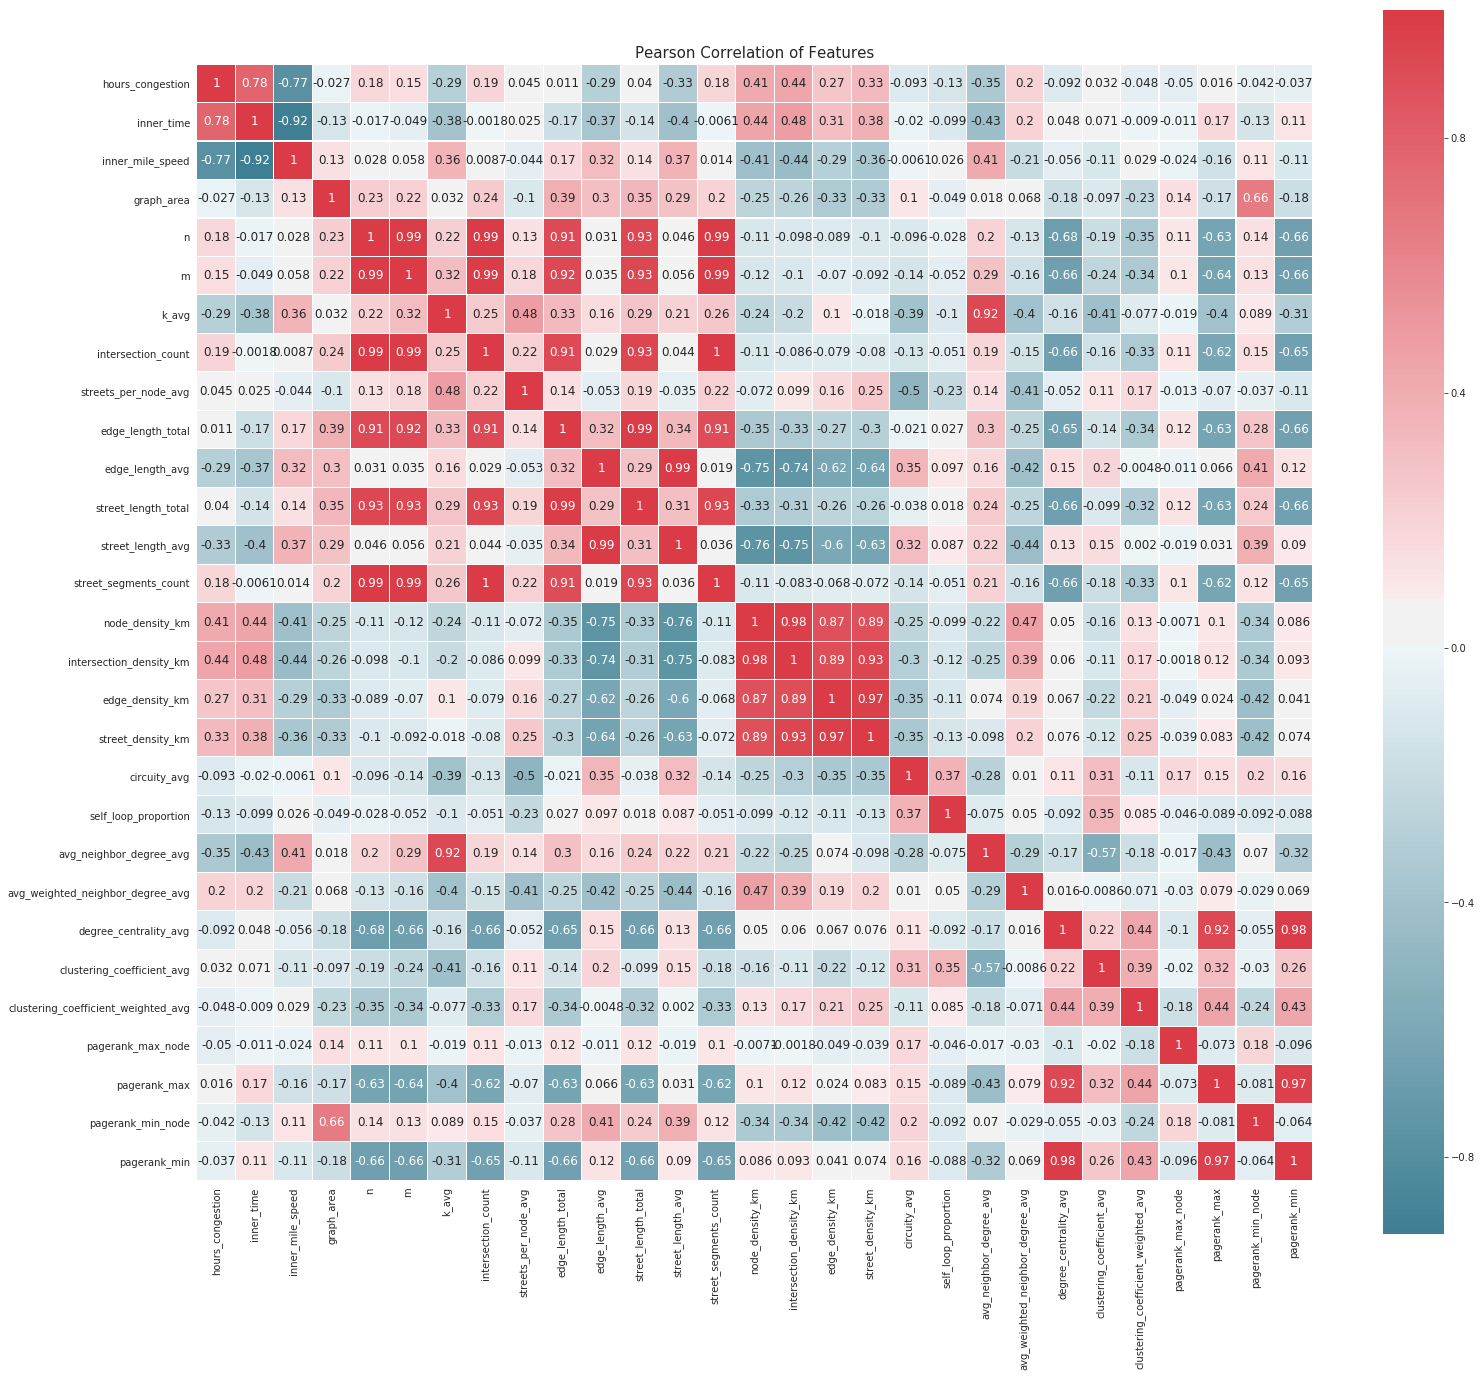

In [21]:
correlation_heatmap(df)

CPU times: user 45.8 s, sys: 166 ms, total: 45.9 s
Wall time: 45.9 s


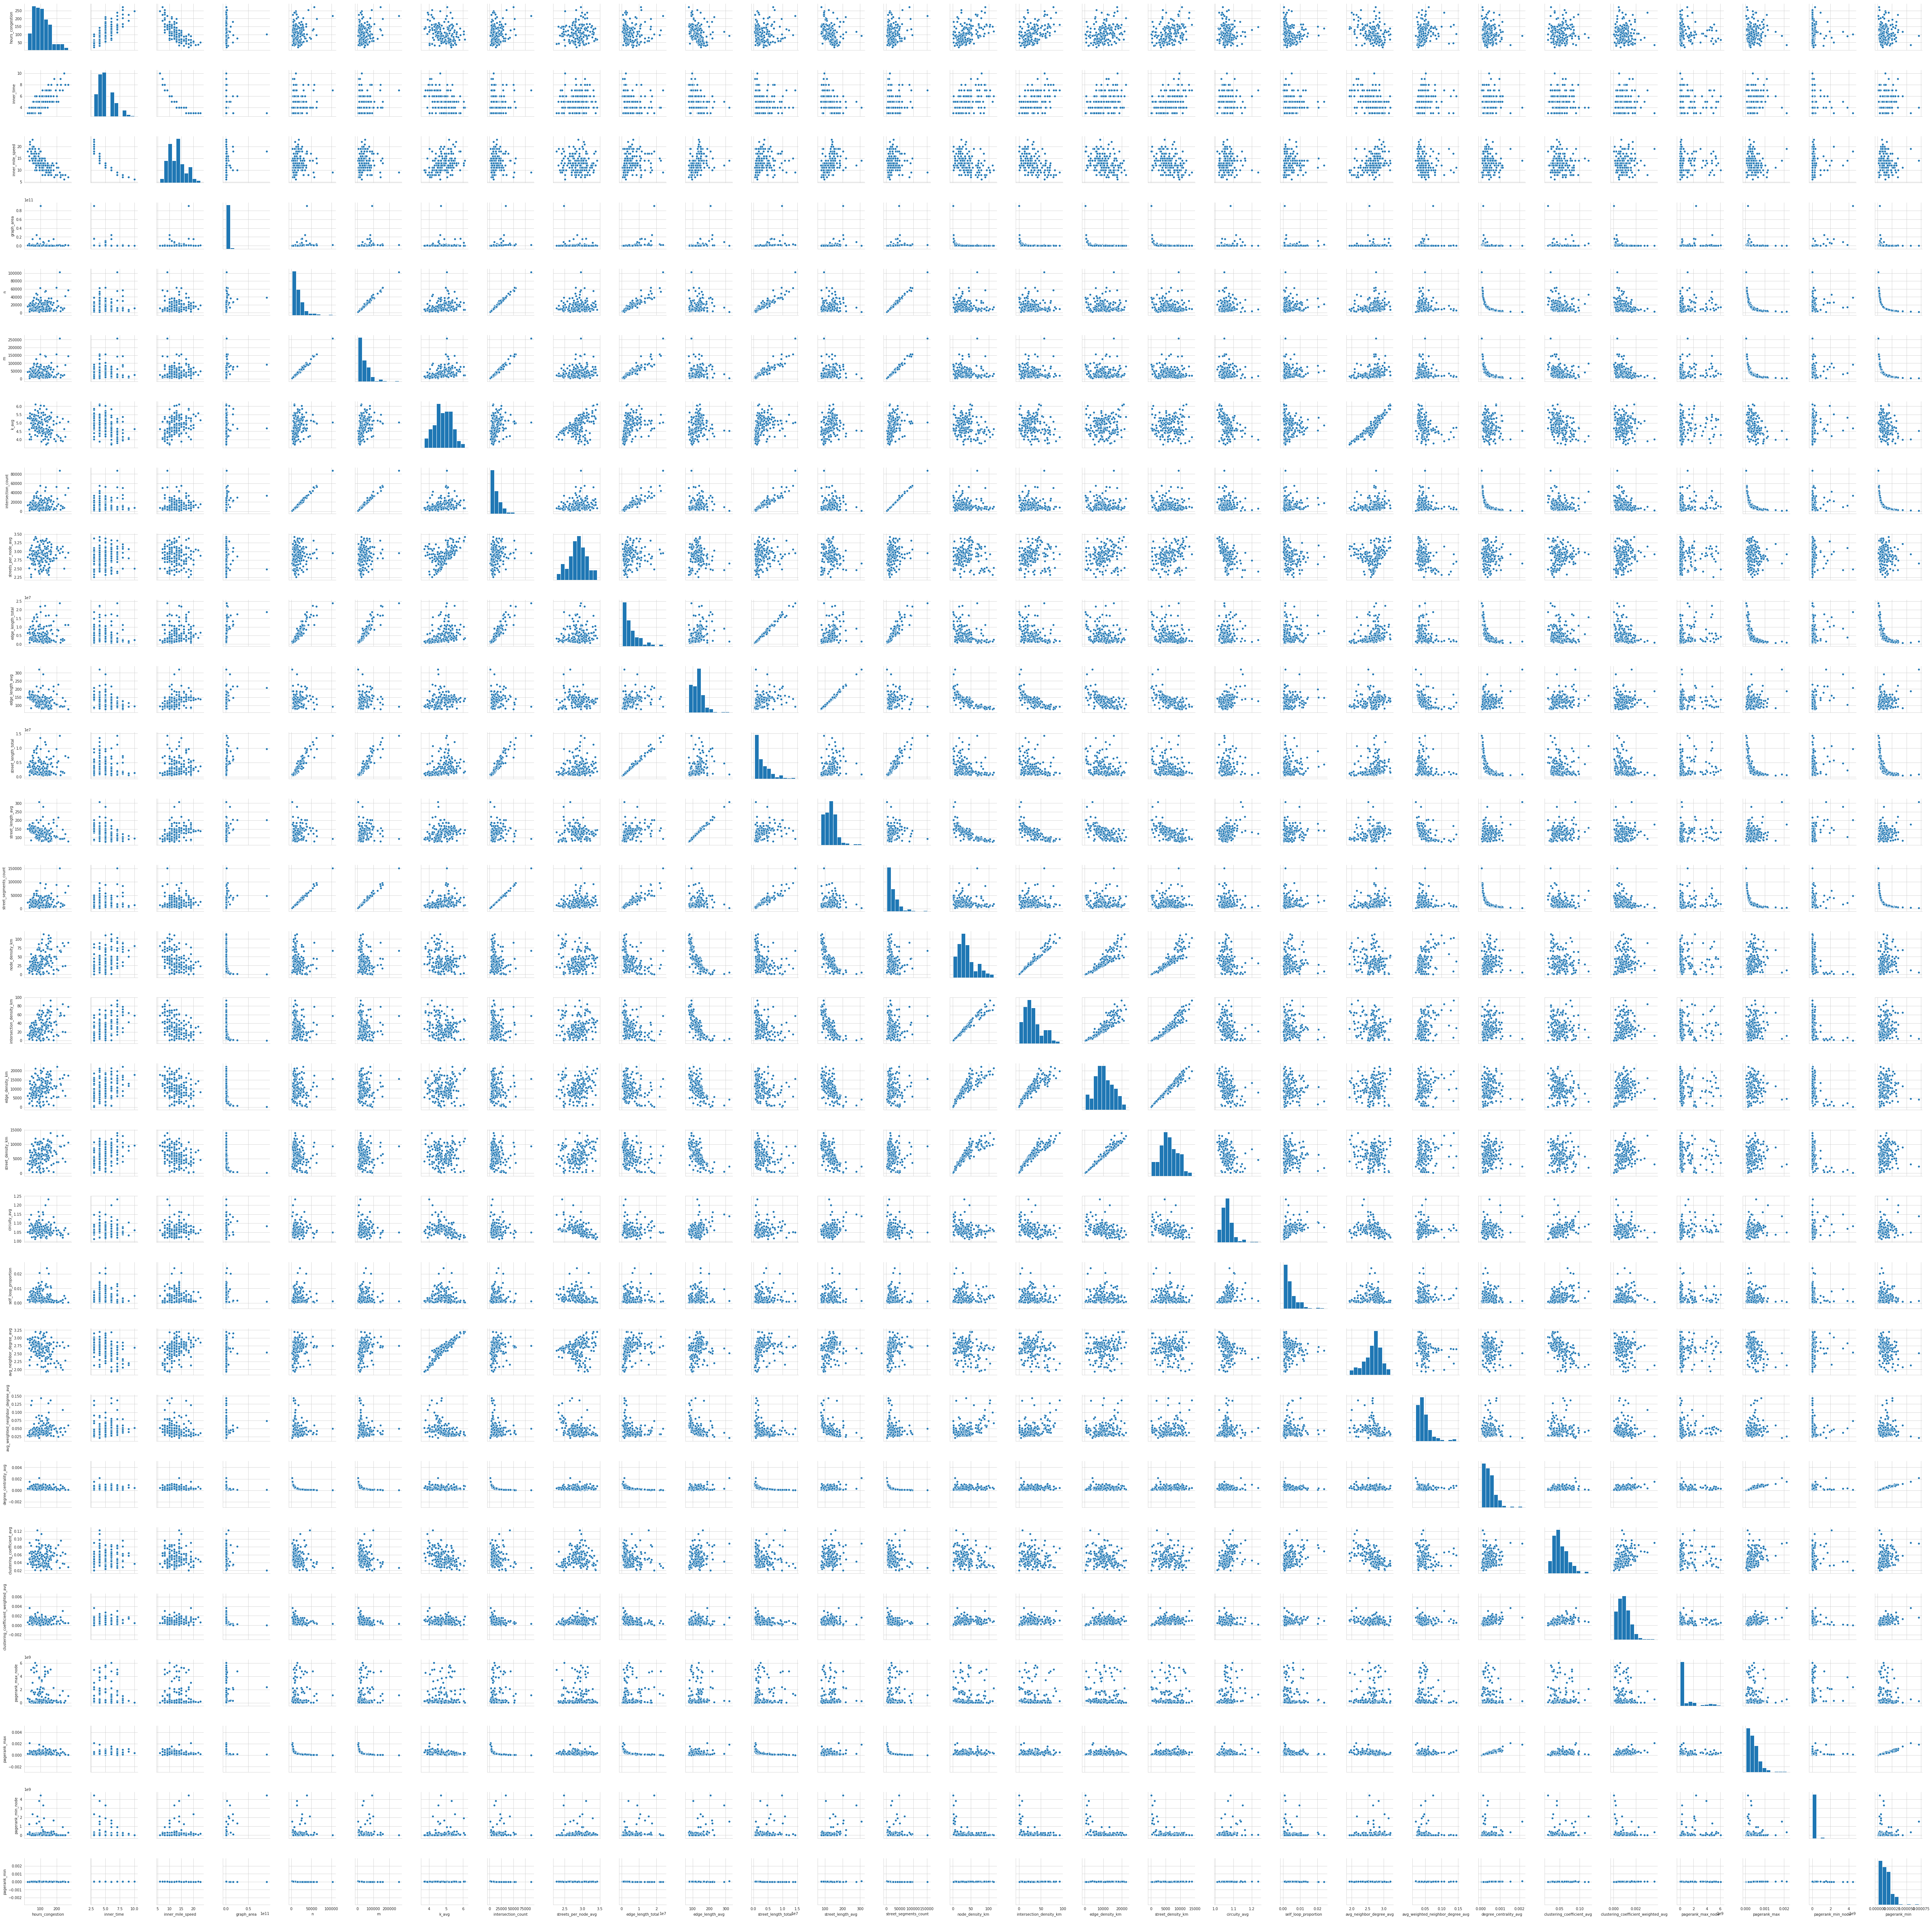

In [22]:
%%time
sns.pairplot(df)

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [24]:
X = df.drop('city_name', axis=1)

In [25]:
X = StandardScaler().fit_transform(X)


Text(0, 0.5, 'Explained Variation')

<Figure size 432x288 with 0 Axes>

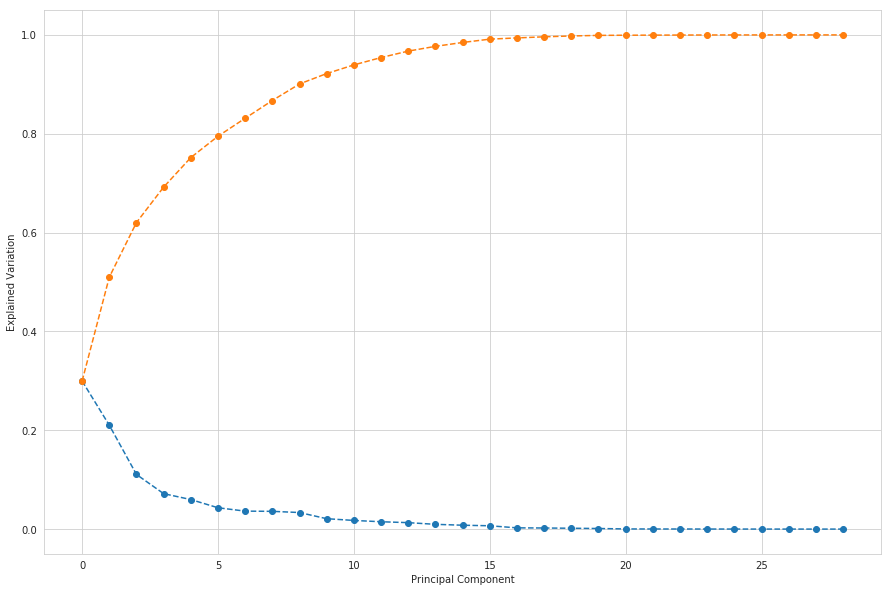

In [26]:
pca = PCA().fit(X);

plt.figure()
plt.subplots(figsize =(15, 10))      
plt.plot(pca.explained_variance_ratio_, "--o")
plt.plot(pca.explained_variance_ratio_.cumsum(), "--o")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variation")

In [27]:
# so with n = 10 we can preserve 95% most of the data variation
N_PC = 10

pca = PCA(n_components=N_PC)
components = pca.fit_transform(X)

In [29]:
df_pca = pd.DataFrame(data=components, columns=['pc_' + str(x) for x in range(N_PC)])

In [30]:
df_pca.head()

pc_0      pc_1      pc_2      pc_3      pc_4      pc_5      pc_6  \
0  1.763379 -0.300944  1.263759 -0.632963 -0.421911 -0.036310 -0.360809   
1 -1.157786 -0.457394  0.303476 -1.085008 -1.636811  0.751329  0.140934   
2 -2.127836  0.334308 -0.987129  0.825108  0.140695 -0.938626 -0.144404   
3  0.331075  0.918346  0.906325  0.067169 -2.059970 -0.222389  0.436336   
4  5.047489  1.797253 -4.092050  0.050410 -2.518662 -0.665395  0.047064   

       pc_7      pc_8      pc_9  
0 -0.484782 -0.408402 -0.706188  
1 -0.662169  0.263089 -0.575005  
2 -0.964851 -0.176252  0.132212  
3  1.097737  1.991189  0.275855  
4  1.174284  2.005827  1.177362

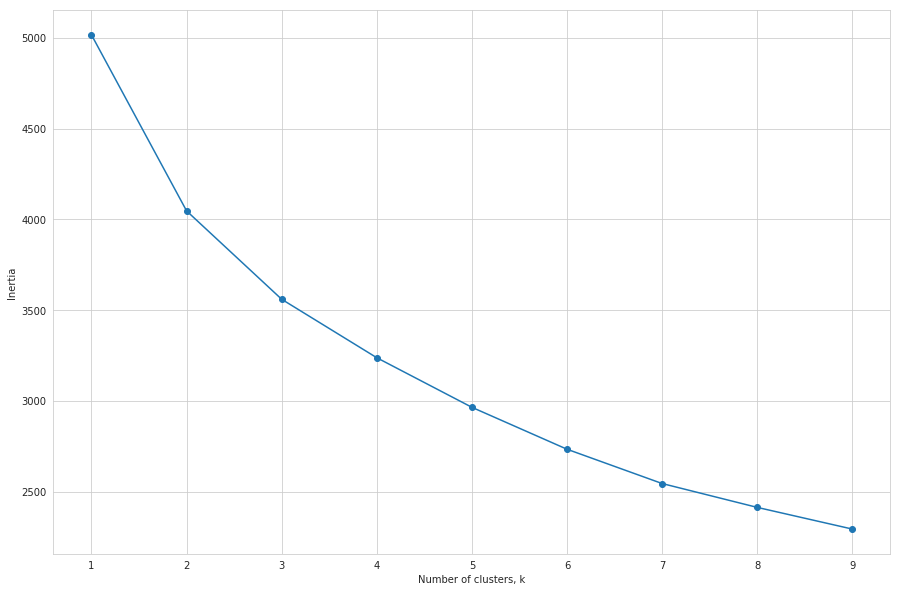

In [31]:
# check the optimal k value
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(X)
    inertias.append(model.inertia_)

plt.figure(figsize=(15,10))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
# plt.xticks(ks)
plt.show()

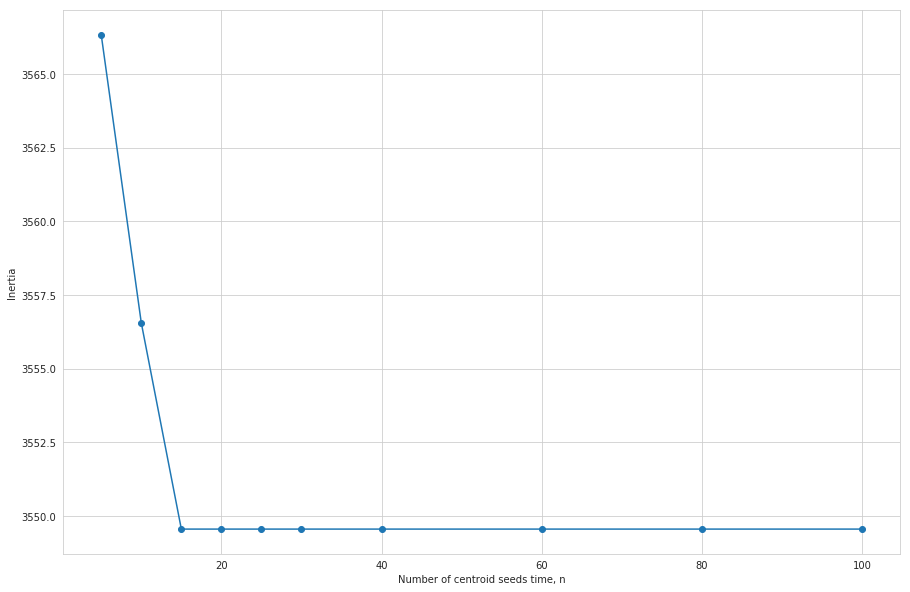

In [32]:
# check the optimal n_init value
ns = [5, 10, 15, 20, 25, 30, 40, 60, 80, 100]
N_CLUSTERS = 3
inertias = []

for n in ns:
    model = KMeans(n_clusters=N_CLUSTERS, n_init=n)
    model.fit(X)
    inertias.append(model.inertia_)

plt.figure(figsize=(15,10))
plt.plot(ns, inertias, '-o')
plt.xlabel('Number of centroid seeds time, n')
plt.ylabel('Inertia')
# plt.xticks(ns)
plt.show()

In [33]:
N_INIT = 20

kmeans = KMeans(n_clusters=N_CLUSTERS, n_init=N_INIT, max_iter=500, n_jobs=-1)
kmeans.fit(df_pca)
y_kmeans = kmeans.predict(df_pca)

In [34]:
df['cluster'] = y_kmeans
df_pca['cluster'] = y_kmeans

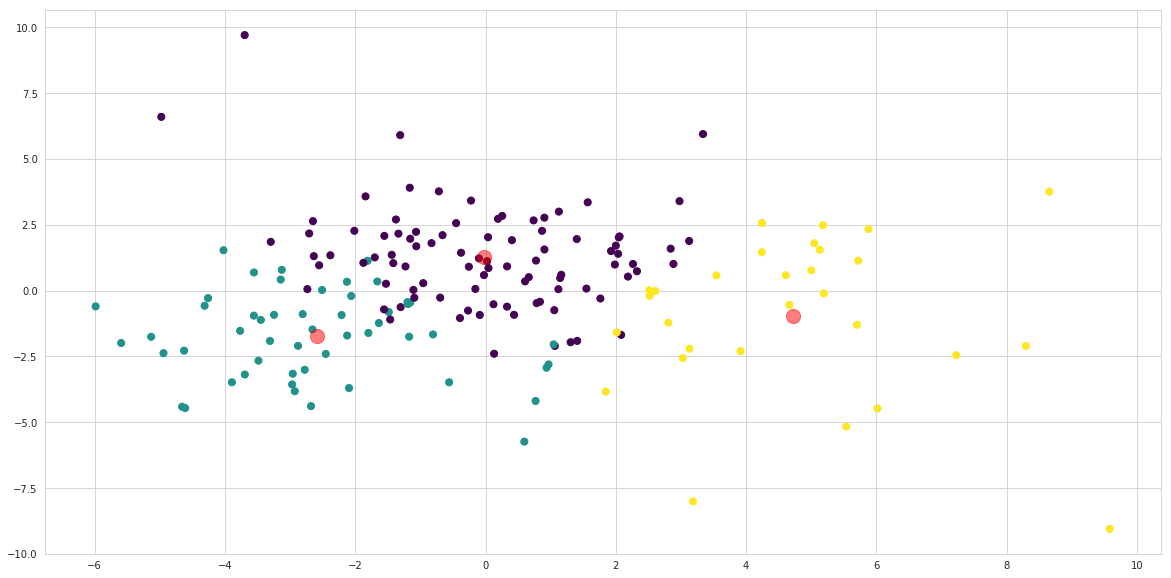

In [35]:
plt.figure(figsize=(20,10))
plt.scatter(df_pca['pc_0'], df_pca['pc_1'], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

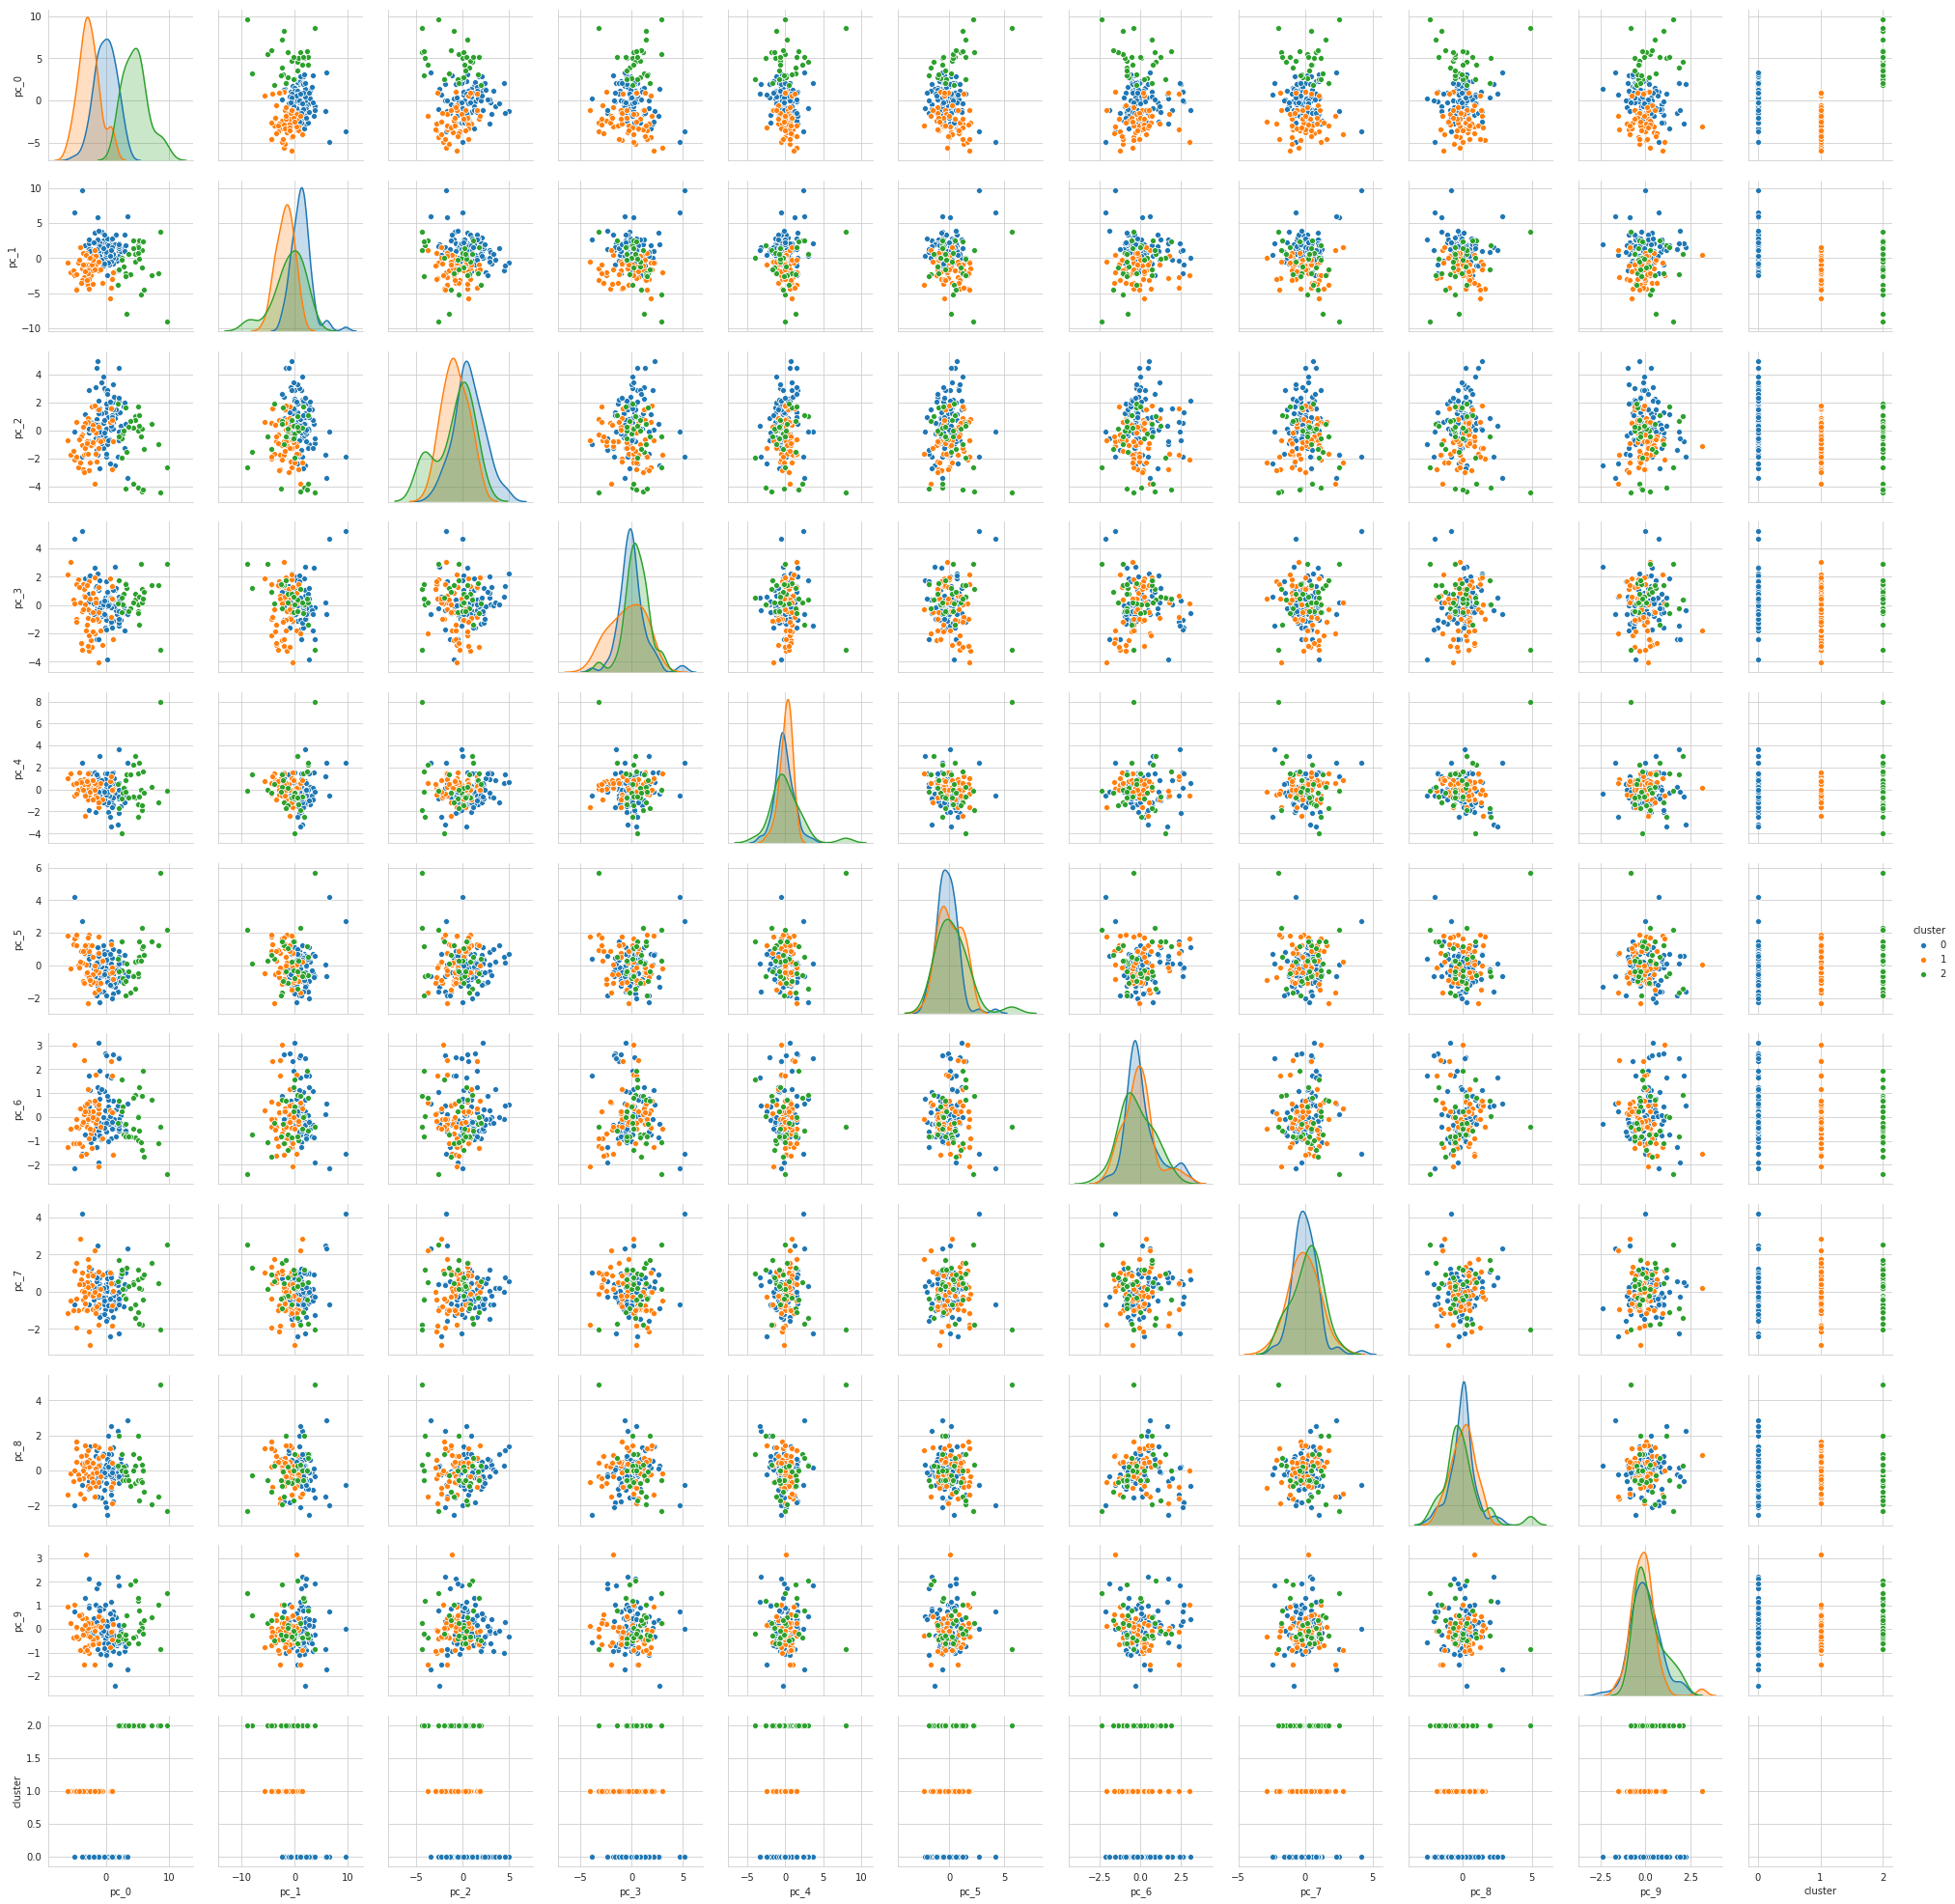

In [36]:
sns.pairplot(df_pca, hue='cluster', diag_kws=None)

In [37]:
# heat map: Y axis first PC, X second PC, Z is the third PC
# color would be the hour congestion, inter time, iner mile speed

In [38]:
from sklearn.manifold import TSNE

In [39]:
%%time
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=500)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 173 samples in 0.000s...
[t-SNE] Computed neighbors for 173 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 173 / 173
[t-SNE] Mean sigma: 2.714836
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.410507
[t-SNE] KL divergence after 500 iterations: 0.404817
CPU times: user 1 s, sys: 0 ns, total: 1 s
Wall time: 410 ms


In [40]:
df_tsne = pd.DataFrame(df)
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

In [41]:
df_tsne.head()

city_name  hours_congestion  inner_time  inner_mile_speed  \
0  albuquerque, nm                57           4                16   
1        amsterdam                69           4                16   
2          antwerp               141           6                10   
3      atlanta, ga               108           4                14   
4         auckland               150           5                11   

     graph_area      n      m     k_avg  intersection_count  \
0  6.770976e+08  22985  57726  5.022928               18919   
1  2.475683e+08  13227  30250  4.573977               11337   
2  2.494694e+08   8058  18083  4.488210                7168   
3  4.616458e+08  14105  36697  5.203403               11775   
4  1.075468e+10  36767  83730  4.554628               28758   

   streets_per_node_avg    ...     degree_centrality_avg  \
0              2.904111    ...                  0.000219   
1              2.912527    ...                  0.000346   
2              2.944775    ...                  0.000557   
3              2.823680    ...                  0.000369   
4              2.637936    ...                  0.000124   

   clustering_coefficient_avg  clustering_coefficient_weighted_avg  \
0                    0.047554                             0.000620   
1                    0.062075                             0.001025   
2                    0.066915                             0.000914   
3                    0.053780                             0.001787   
4                    0.084472                             0.000353   

   pagerank_max_node  pagerank_max  pagerank_min_node  pagerank_min  cluster  \
0          140886274      0.000172          140740499      0.000007        0   
1           46388344      0.000337           46128874      0.000011        1   
2          338768932      0.000685           21280953      0.000019        1   
3           69373735      0.000239           68151642      0.000011        0   
4          354096404      0.000124          316392510      0.000004        2   

     x-tsne    y-tsne  
0  1.458689  1.843121  
1 -0.603732 -2.229707  
2 -2.252746 -2.061253  
3 -1.413365  2.224111  
4  3.903775 -0.145107  

[5 rows x 33 columns]

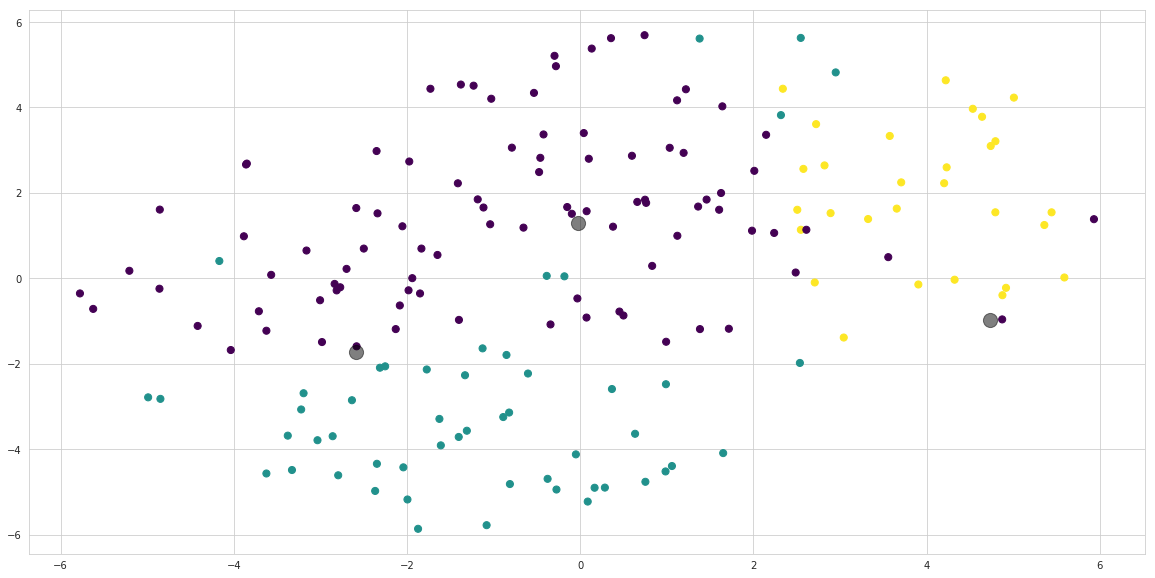

In [42]:
plt.figure(figsize=(20,10))
plt.scatter(df_tsne['x-tsne'], df_tsne['y-tsne'], c=df_tsne['cluster'], s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


In [43]:
df.head()

city_name  hours_congestion  inner_time  inner_mile_speed  \
0  albuquerque, nm                57           4                16   
1        amsterdam                69           4                16   
2          antwerp               141           6                10   
3      atlanta, ga               108           4                14   
4         auckland               150           5                11   

     graph_area      n      m     k_avg  intersection_count  \
0  6.770976e+08  22985  57726  5.022928               18919   
1  2.475683e+08  13227  30250  4.573977               11337   
2  2.494694e+08   8058  18083  4.488210                7168   
3  4.616458e+08  14105  36697  5.203403               11775   
4  1.075468e+10  36767  83730  4.554628               28758   

   streets_per_node_avg    ...     degree_centrality_avg  \
0              2.904111    ...                  0.000219   
1              2.912527    ...                  0.000346   
2              2.944775    ...                  0.000557   
3              2.823680    ...                  0.000369   
4              2.637936    ...                  0.000124   

   clustering_coefficient_avg  clustering_coefficient_weighted_avg  \
0                    0.047554                             0.000620   
1                    0.062075                             0.001025   
2                    0.066915                             0.000914   
3                    0.053780                             0.001787   
4                    0.084472                             0.000353   

   pagerank_max_node  pagerank_max  pagerank_min_node  pagerank_min  cluster  \
0          140886274      0.000172          140740499      0.000007        0   
1           46388344      0.000337           46128874      0.000011        1   
2          338768932      0.000685           21280953      0.000019        1   
3           69373735      0.000239           68151642      0.000011        0   
4          354096404      0.000124          316392510      0.000004        2   

     x-tsne    y-tsne  
0  1.458689  1.843121  
1 -0.603732 -2.229707  
2 -2.252746 -2.061253  
3 -1.413365  2.224111  
4  3.903775 -0.145107  

[5 rows x 33 columns]

In [44]:
df.to_csv('clusters.csv', index=False)

## Data relations
This time is to explore the relation of the graph properties with the congestion

In [46]:
# now we will separate the data into 3 groups

df_1 = df[df['cluster'] == 0]
df_2 = df[df['cluster'] == 1]
df_3 = df[df['cluster'] == 2]

In [47]:
print(df_1.shape, df_2.shape, df_3.shape)

(92, 33) (52, 33) (29, 33)


In [51]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 170
Data columns (total 33 columns):
city_name                              92 non-null object
hours_congestion                       92 non-null int64
inner_time                             92 non-null int64
inner_mile_speed                       92 non-null int64
graph_area                             92 non-null float64
n                                      92 non-null int64
m                                      92 non-null int64
k_avg                                  92 non-null float64
intersection_count                     92 non-null int64
streets_per_node_avg                   92 non-null float64
edge_length_total                      92 non-null float64
edge_length_avg                        92 non-null float64
street_length_total                    92 non-null float64
street_length_avg                      92 non-null float64
street_segments_count                  92 non-null int64
node_density_km           

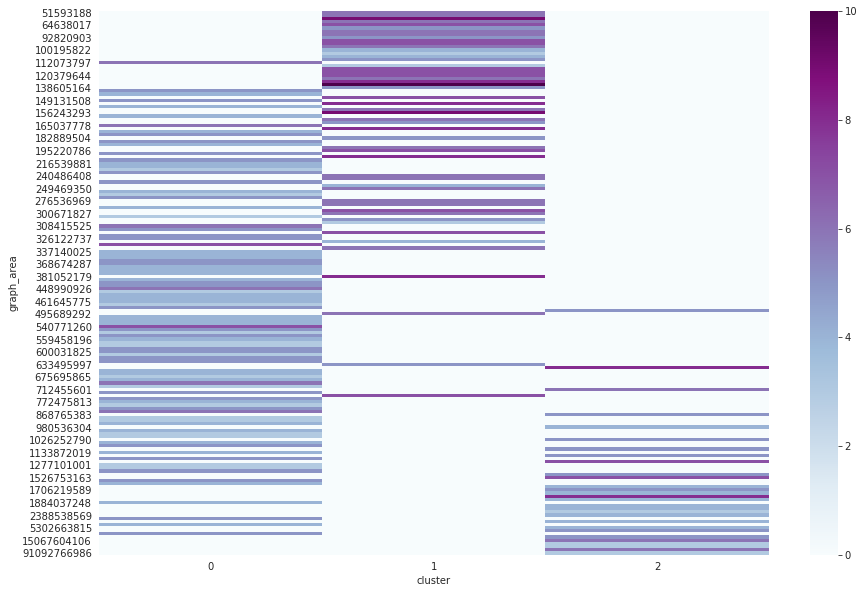

In [109]:
test = df.sort_values(['cluster'])
test['graph_area'] = test['graph_area'].astype(int)
test = test.pivot('intersection_density_km', 'cluster', 'inner_time')

test = test.fillna(0)
# test['street_length_avg'].astype(int)
plt.subplots(figsize =(15, 10))
sns.heatmap(test, cmap='BuPu')

In [78]:
test.head()

cluster            0    1    2
city_name                     
albuquerque, nm  4.0  0.0  0.0
amsterdam        0.0  4.0  0.0
antwerp          0.0  6.0  0.0
atlanta, ga      4.0  0.0  0.0
auckland         0.0  0.0  5.0